In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Overfitting and Regularization

"*With four parameters I can fit an elephant, and with five I can make him wiggle his trunk*" (John von Newmann)

**Table of Contents**

- [Overfitting](#1.-Overfitting)
- [Regularization](#2.-Regularization)

## 1. Overfitting

A common danger in machine learning is **overfitting**--producing a model that performs well on the data you train it on but generalizes poorly to any new data. Models that are too complex lead to overfitting and don't generalize well beyond the data they were trained on.

Let's look at an example. First, let's generate some nonlinear data, based on $y = 5x\sin(20x)$.

Text(0, 0.5, 'y')

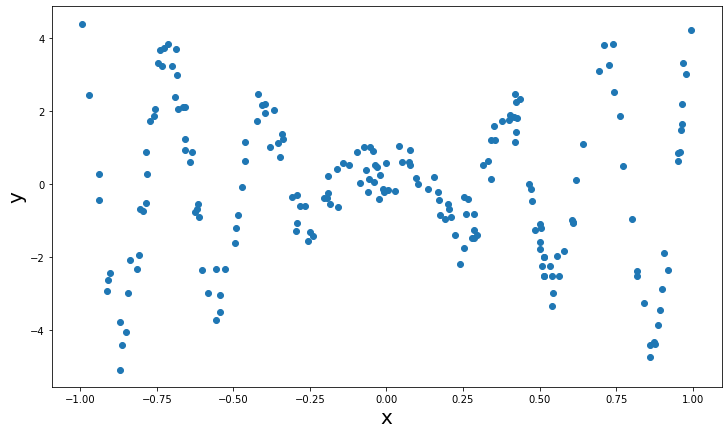

In [2]:
m=200
x = -1 + 2*np.random.rand(m)
y = 5*x*np.sin(20*x)+ 0.5*np.random.randn(m)

plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)


Let us split the dataset, so that three quarters of it is used to train the model, after which we measure the model's performance on the remaining quarter.

In [3]:
x_train, y_train = x[0:150], y[0:150] #first 3/4
x_test, y_test = x[150:m], y[150:m] #last 1/4

Let's fit degree-d polynomials to the data

$$
y = \theta_0 + \theta_1x+\theta_2x^2 + \cdots + \theta_d x^d
$$

If we perform high-degree polynomial regression, we will likely fit the training data much better than with linear regression.

Training Set Mean Squared Error: 0.2617909020439273
Test Set Mean Squared Error: 0.3862544236150647


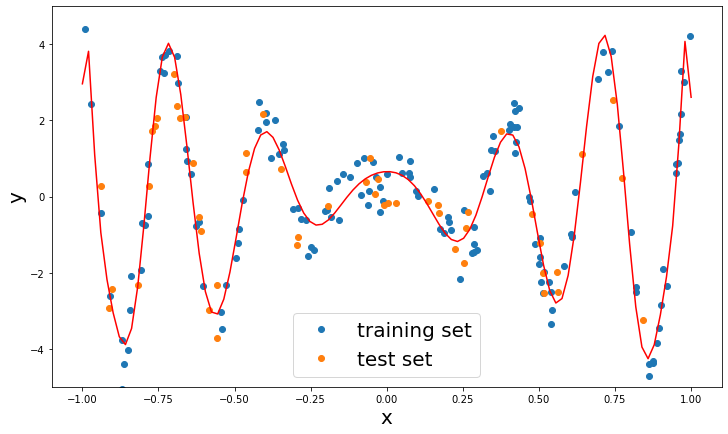

In [4]:
degree = 20 # try 1, 20 and 200
m_train = len(x_train) # size of the training set
m_test = len(x_test) # size of the test set
m_plot = 100 # 
x_plot = np.linspace(-1,1,m_plot) 

'build feature matrices'
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_train[:,i+1] = x_train**(i+1)
    X_test[:,i+1] = x_test**(i+1)
    X_plot[:,i+1] = x_plot**(i+1)
    
'best linear model'
theta = np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x_train,y_train,'o',label='training set')
plt.plot(x_test,y_test,'o',label='test set')
plt.legend(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.ylim([-5,5])

'plot linear model'       
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE_train = np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

The degree-200 polynomial regression model is overfitting the training data, while the linear model (degree 1) is underfitting it. 
The model that will generalize best in this case is the degree-20 model.

How can we tell that our model is overfitting or underfitting the data? One way is to look at the training and test mean squared errors as a function of the degree. 

Text(0, 0.5, 'mean squared error')

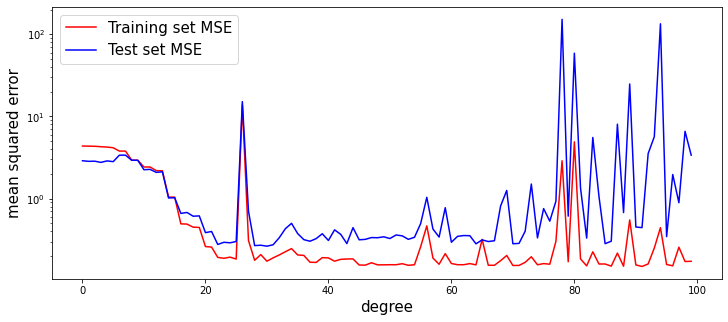

In [5]:
max_degree = 100
# initialize MSE vectors
MSE_test = np.zeros(max_degree)
MSE_train = np.zeros(max_degree)
# loop over degrees
for degree in range(max_degree): # degree = 0, 1, 2, ..., max_degree
    'build feature matrices'
    X_train = np.ones((m_train,degree+1))
    X_test = np.ones((m_test,degree+1))
    for i in range(degree):
        X_train[:,i+1] = x_train**(i+1)
        X_test[:,i+1] = x_test**(i+1)
        
    'best linear model'
    theta = np.linalg.solve(X_train.T.dot(X_train), X_train.T.dot(y_train))
    
    'Mean squared errors'
    MSE_train[degree]=np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
    MSE_test[degree]=np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)

# plot results
plt.figure(figsize=(12,5))
plt.semilogy(range(max_degree),MSE_train,'r-',label='Training set MSE') #semilogarithmic plot
plt.semilogy(range(max_degree),MSE_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)
plt.xlabel('degree', fontsize=15)
plt.ylabel('mean squared error', fontsize=15)

## 2. Regularization

A good way to reduce overfitting is to regularize our model (i.e., to constrain it).
A simple way to regularize a polynomial model is to reduce its degree.
Another way is to constrain the size of its coefficients.

We add a regularization term to the mean squared error:

$$
E(\theta) = \mbox{MSE}(\theta) + \frac{C}{m}\cdot\|\theta\|^2 = \frac{1}{m}\|y-X\theta\|^2 + \frac{C}{m}\cdot\|\theta\|^2.
$$

The regularization term

$$
\frac{C}{m}\cdot\|\theta\|^2
$$

will penalize vectors $\theta$ with large entries.
The parameter $C$ (known as the regularization constant) controls how much you want to regularize the model. 
If $C=0$ then we are just doing regression.

The vector $\theta$ that minimizes $E(\theta)$ satisfies the system of linear equations

$$
(X^TX + C I_n)\theta = X^T y
$$

Training Set Mean Squared Error: 0.4420203372175438
Test Set Mean Squared Error: 0.5905049978896347


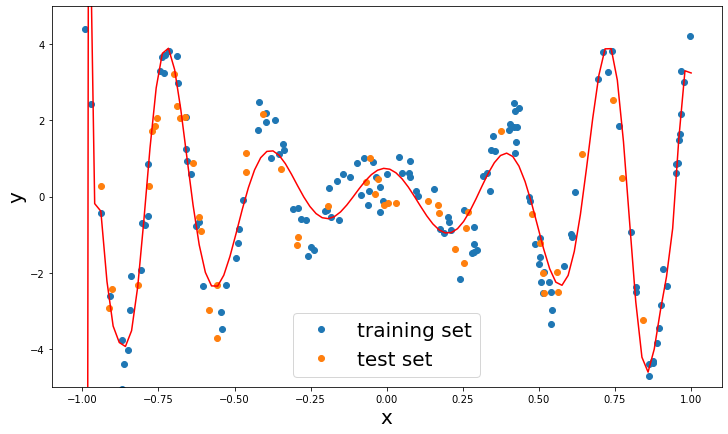

In [6]:
degree = 100 #
C = 1e-8 # regularization constant
m_train = len(x_train) # size of the training set
m_test = len(x_test) # size of the test set
m_plot = 100 # 
x_plot = np.linspace(-1,1,m_plot) 

'build feature matrices'
X_train = np.ones((m_train,degree+1))
X_test = np.ones((m_test,degree+1))
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_train[:,i+1] = x_train**(i+1)
    X_test[:,i+1] = x_test**(i+1)
    X_plot[:,i+1] = x_plot**(i+1)
    
'best linear model'
theta = np.linalg.solve(X_train.T.dot(X_train)+C*np.identity(degree+1), X_train.T.dot(y_train))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x_train,y_train,'o',label='training set')
plt.plot(x_test,y_test,'o',label='test set')
plt.legend(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.ylim([-5,5])

'plot linear model'       
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE_train = np.linalg.norm(y_train-X_train.dot(theta))**2/len(x_train)
MSE_test = np.linalg.norm(y_test-X_test.dot(theta))**2/len(x_test)
print('Training Set Mean Squared Error: '+str(MSE_train))
print('Test Set Mean Squared Error: '+str(MSE_test))

We can plot the training and test mean squared errors as a function of the regularization constant $C$.

Text(0.5, 0, 'regularization constant')

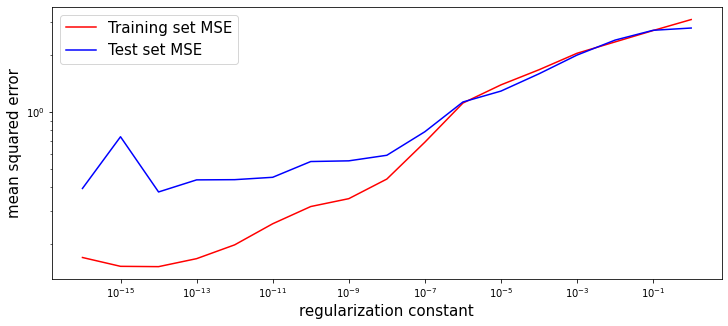

In [7]:
degree = 100
C_list = 10.0**(np.arange(-16,1)) # regularization constants

'initialize MSE vectors'
MSE_test = np.zeros(len(C_list))
MSE_train = np.zeros(len(C_list))
for idx,C in enumerate(C_list): 
    'build feature matrices'
    X_train = np.ones((m_train,degree+1))
    X_test = np.ones((m_test,degree+1))
    for i in range(degree):
        X_train[:,i+1] = x_train**(i+1)
        X_test[:,i+1] = x_test**(i+1)
        
    'best linear model'
    theta = np.linalg.solve(X_train.T.dot(X_train)+C*np.identity(degree+1), X_train.T.dot(y_train))
    
    'Mean squared errors'
    MSE_train[idx]=np.sum((y_train-X_train.dot(theta))**2)/len(x_train)
    MSE_test[idx]=np.sum((y_test-X_test.dot(theta))**2)/len(x_test)

'plot results'
plt.figure(figsize=(12,5))
plt.loglog(C_list,MSE_train,'r-',label='Training set MSE') 
plt.loglog(C_list,MSE_test,'b-',label='Test set MSE')
plt.legend(fontsize = 15)
plt.ylabel('mean squared error', fontsize=15)
plt.xlabel('regularization constant', fontsize=15)